# Bắt đầu

## Dự đoán khả năng sống sót trên tàu Titanic

### thêm các thư viện cần thiết

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [5]:
df=pd.read_csv("train.csv")
print(df.head())
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [6]:
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [7]:
has_null = df.isnull().sum().any()
has_nan  = df.isna().sum().any()
n_duplicated = df.duplicated().sum()
print(f'Tính toàn vẹn dữ liệu:')
print(f'+ Có giá trị Null: {has_null}')
if has_null:
    df['Age']=df['Age'].fillna(df['Age'].mean())
    df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])  
print(f'+ Có giá trị Nan: {has_nan}')
if has_nan:
    df = df.dropna()   
print(f'+ Số dòng trùng: {n_duplicated}')
if n_duplicated>0:
    df = df.drop_duplicates()


Tính toàn vẹn dữ liệu:
+ Có giá trị Null: True
+ Có giá trị Nan: True
+ Số dòng trùng: 0


In [8]:
scaler=MinMaxScaler()
df[['Age','Fare']]=scaler.fit_transform(df[['Age','Fare']])

In [9]:
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])

In [10]:
df=pd.get_dummies(df,columns=[])

In [37]:
x=df[['Pclass','Sex','Age','Fare']]

y=df['Survived']
selected_features = importances[importances > 0.05].index
x_new = x[selected_features]
x_train,x_test,y_train,y_test=train_test_split(
    x_new,y,test_size=0.2,random_state=43
) # chia 80 train 20 test 

In [38]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [39]:
y_pred=model.predict(x_test)
print("Do chinh xac:",accuracy_score(y_test,y_pred))

Do chinh xac: 0.8258426966292135


In [40]:
models = [
    ("Logistic Regression", LogisticRegression()),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("SVM", SVC()),
    ("Naive Bayes", GaussianNB())
]
for name, model in models:
    scores = cross_val_score(model, x, y, cv=5)  # 5-fold cross validation
    print(name, "-> Accuracy trung bình:", scores.mean())

Logistic Regression -> Accuracy trung bình: 0.7817875960134577
KNN -> Accuracy trung bình: 0.8031803466006474
Decision Tree -> Accuracy trung bình: 0.7772932139909858
Random Forest -> Accuracy trung bình: 0.8189297276709198
SVM -> Accuracy trung bình: 0.775039674982543
Naive Bayes -> Accuracy trung bình: 0.7683044499460421


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


Accuracy: 0.848314606741573
Precision: 0.8360655737704918
Recall: 0.75
F1: 0.7906976744186046


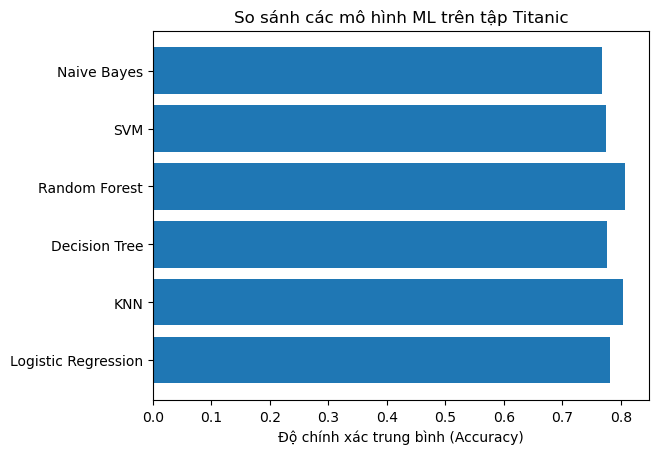

In [42]:
import matplotlib.pyplot as plt

names = []
means = []

for name, model in models:
    scores = cross_val_score(model, x, y, cv=5)
    names.append(name)
    means.append(scores.mean())

plt.barh(names, means)
plt.xlabel("Độ chính xác trung bình (Accuracy)")
plt.title("So sánh các mô hình ML trên tập Titanic")
plt.show()


# Kết thúc